# 1.Setup

A configuração de setup é o processo de preparar e organizar o ambiente para uso. Envolvendo a instalação de bibliotecas e configuração de outros ajustes necessários. O objetivo é criar um ambiente funcional para executar tarefas específicas.

## 1.1.Conexão com drive

Para realizar a análise, padronização e manipulação dos dados é necessário selecionar a base de dados desejada. Neste documento a importação da mesma será feita através do Google Drive e o arquivo está em formato excel (csv).

In [1]:
#Conectar com o Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pandas as pd
import pandas
import sklearn

In [3]:
cnpjs_3 = pd.read_csv('/content/drive/MyDrive/T4M8G2/DADOS/CNPJ/cnpjs_3.csv', delimiter=';')

<ipython-input-3-a274b2515742>:1: DtypeWarning: Columns (29,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  cnpjs_3 = pd.read_csv('/content/drive/MyDrive/T4M8G2/DADOS/CNPJ/cnpjs_3.csv', delimiter=';')


In [4]:
cnpjs_3

,data,cnpj,cnpj_basico,cnpj_ordem,cnpj_dv,identificador_matriz_filial,nome_fantasia,situacao_cadastral,data_situacao_cadastral,motivo_situacao_cadastral,...,cep,ddd_1,telefone_1,ddd_2,telefone_2,ddd_fax,fax,email,situacao_especial,data_situacao_especial
0,2021-12-24,12556610000155,12556610,1,55,1,BAR DO SEBASTIAO,2,2010-09-20,0,...,69900050,68.0,92114523.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-12-24,26894870000145,26894870,1,45,1,CASA NOSTRA,2,2019-09-11,0,...,69900541,68.0,92137604.0,68.0,33254911.0,NaN,NaN,rbmcontabilidadeac@gmail.com,NaN,NaN
2,2021-12-24,37981764000115,37981764,1,15,1,LINNE BURG BEER,2,2020-08-05,0,...,69901328,68.0,99497655.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-12-24,22398569000190,22398569,1,90,1,BAR E MERCEARIA VALDIVINO,2,2015-05-07,0,...,69902419,68.0,99021143.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-12-24,13082428000172,13082428,1,72,1,NaN,2,2011-01-08,0,...,69905801,68.0,32420354.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024570,2022-05-12,40757069000189,40757069,1,89,1,CONVENIENCIA+ 1 GOLE,2,2021-02-08,0,...,77870000,63.0,85131764.0,NaN,NaN,NaN,NaN,lariciabc@hotmail.com,NaN,NaN
2024571,2022-05-12,13351092000104,13351092,1,4,1,LOS HERMANOS,2,2011-03-11,0,...,77870000,63.0,84135517.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024572,2022-05-12,40424373000104,40424373,1,4,1,BAR BORA LA,2,2021-01-16,0,...,77870000,63.0,84945913.0,NaN,NaN,NaN,NaN,helenemariamartins@gmail.com,NaN,NaN
2024573,2022-05-12,27711890000104,27711890,1,4,1,ADEGA DO BAIXINHO,2,2017-05-11,0,...,77890000,63.0,92927967.0,63.0,92185694.0,63.0,34421945.0,baixinhodaadega@gmail.com,NaN,NaN


In [5]:
quantidadeLinhas = cnpjs_3.shape[0]
print("A tabela possui", quantidadeLinhas, "linhas.")

A tabela possui 2024575 linhas.


In [6]:
cnpjs_3.describe()

,cnpj,cnpj_basico,cnpj_ordem,cnpj_dv,identificador_matriz_filial,situacao_cadastral,motivo_situacao_cadastral,nome_cidade_exterior,id_pais,cnae_fiscal_principal,id_municipio,id_municipio_rf,cep,ddd_1,telefone_1,ddd_2,telefone_2,ddd_fax
count,2.024575e+06,2.024575e+06,2.024575e+06,2.024575e+06,2.024575e+06,2024575.0,2024575.0,0.0,5098.0,2024575.0,2.024575e+06,2.024575e+06,2.024575e+06,1.983607e+06,1.983607e+06,97312.000000,9.712700e+04,102364.000000
mean,2.838805e+13,2.838805e+07,1.012522e+00,4.500779e+01,1.006134e+00,2.0,0.0,NaN,105.0,5611204.0,3.512401e+06,5.926098e+03,4.513860e+07,3.981191e+01,7.013270e+07,33.873633,4.998006e+07,33.064603
std,1.265851e+13,1.265851e+07,1.205930e+00,3.040697e+01,7.807698e-02,0.0,0.0,NaN,0.0,0.0,7.760702e+05,2.338532e+03,2.950692e+07,6.414997e+01,2.952581e+07,23.094162,2.942206e+07,42.911048
min,2.259000e+09,2.259000e+03,1.000000e+00,0.000000e+00,1.000000e+00,2.0,0.0,NaN,105.0,5611204.0,1.100015e+06,1.000000e+00,1.004010e+06,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,1.913197e+13,1.913197e+07,1.000000e+00,1.700000e+01,1.000000e+00,2.0,0.0,NaN,105.0,5611204.0,3.140001e+06,4.625000e+03,1.832000e+07,1.900000e+01,3.551566e+07,15.000000,3.251974e+07,16.000000
50%,2.862692e+13,2.862692e+07,1.000000e+00,4.400000e+01,1.000000e+00,2.0,0.0,NaN,105.0,5611204.0,3.511102e+06,6.251000e+03,3.664000e+07,3.300000e+01,8.663007e+07,31.000000,3.579168e+07,27.000000
75%,3.717555e+13,3.717555e+07,1.000000e+00,7.100000e+01,1.000000e+00,2.0,0.0,NaN,105.0,5611204.0,4.106902e+06,7.485000e+03,7.538031e+07,5.400000e+01,9.671342e+07,49.000000,8.467928e+07,47.000000
max,9.859065e+13,9.859065e+07,4.530000e+02,9.900000e+01,2.000000e+00,2.0,0.0,NaN,105.0,5611204.0,5.300108e+06,9.997000e+03,9.999000e+07,5.531000e+03,1.000000e+08,99.000000,1.000000e+08,3237.000000


In [7]:
cnpjs_3.info() #aqui podemos ver que não há valores nulos "RangeIndex: 6157939 entries, 0 to 6157938"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024575 entries, 0 to 2024574
Data columns (total 33 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   data                         object 
 1   cnpj                         int64  
 2   cnpj_basico                  int64  
 3   cnpj_ordem                   int64  
 4   cnpj_dv                      int64  
 5   identificador_matriz_filial  int64  
 6   nome_fantasia                object 
 7   situacao_cadastral           int64  
 8   data_situacao_cadastral      object 
 9   motivo_situacao_cadastral    int64  
 10  nome_cidade_exterior         float64
 11  id_pais                      float64
 12  data_inicio_atividade        object 
 13  cnae_fiscal_principal        int64  
 14  cnae_fiscal_secundaria       object 
 15  sigla_uf                     object 
 16  id_municipio                 int64  
 17  id_municipio_rf              int64  
 18  tipo_logradouro              object 
 19  

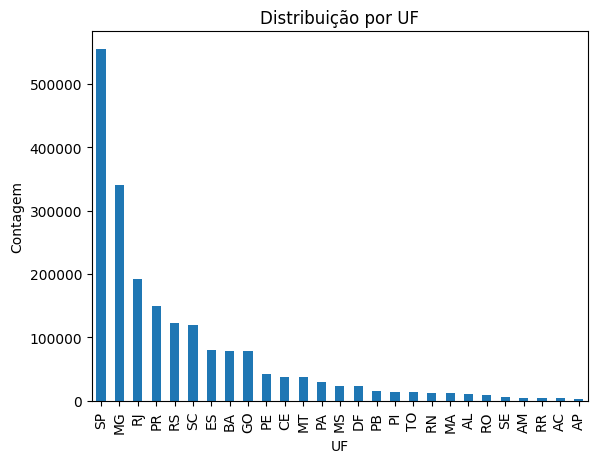

In [8]:
import matplotlib.pyplot as plt

# Exemplo de gráfico de barras
cnpjs_3['sigla_uf'].value_counts().plot(kind='bar')
plt.title("Distribuição por UF")
plt.xlabel("UF")
plt.ylabel("Contagem")
plt.show()


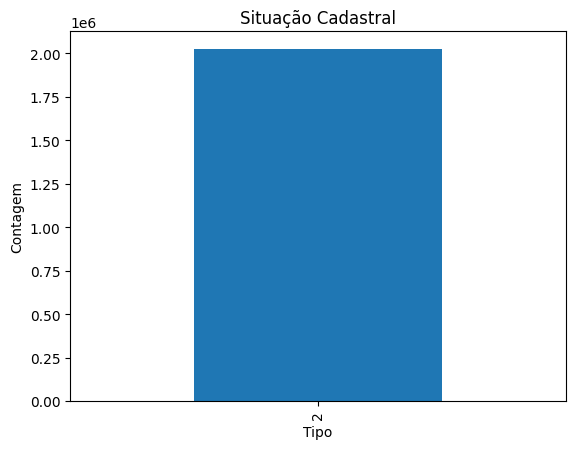

In [9]:
# Exemplo de gráfico de barras
cnpjs_3['situacao_cadastral'].value_counts().plot(kind='bar')
plt.title("Situação Cadastral")
plt.xlabel("Tipo")
plt.ylabel("Contagem")
plt.show()


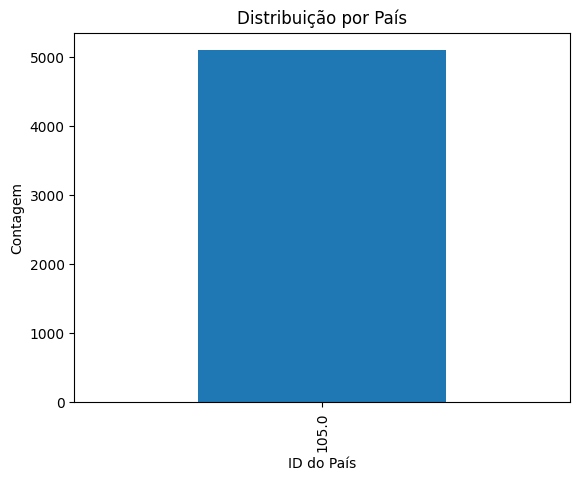

In [10]:
import matplotlib.pyplot as plt

# Exemplo de gráfico de barras
cnpjs_3['id_pais'].value_counts().plot(kind='bar')
plt.title("Distribuição por País")
plt.xlabel("ID do País")
plt.ylabel("Contagem")
plt.show()



#dicionario dos ids dos paises

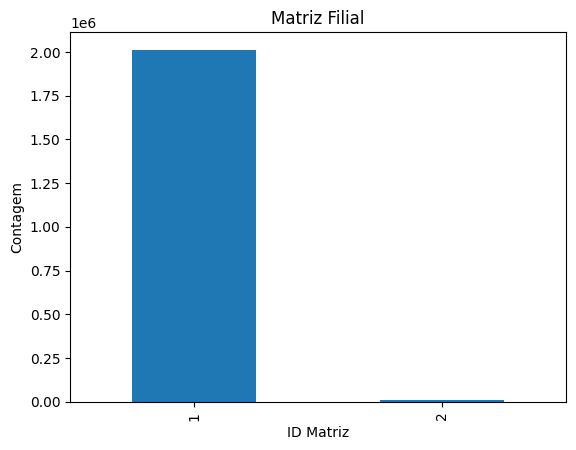

In [11]:
import matplotlib.pyplot as plt

# Exemplo de gráfico de barras
cnpjs_3['identificador_matriz_filial'].value_counts().plot(kind='bar')
plt.title("Matriz Filial")
plt.xlabel("ID Matriz")
plt.ylabel("Contagem")
plt.show()

In [12]:
cnpjs_3['cnae_fiscal_principal'].value_counts()

5611204    2024575
Name: cnae_fiscal_principal, dtype: int64

In [13]:
cnpjs_3['cnpj_basico'].value_counts()

8755044     104
24902734     84
21237272     84
15354412     84
19005186     72
           ... 
41643399      1
26486594      1
9620706       1
42328897      1
45480356      1
Name: cnpj_basico, Length: 183555, dtype: int64

In [14]:
cnpjs_3['id_municipio'].value_counts()

3550308    83639
3304557    62908
3106200    41892
5300108    22869
2927408    21726
           ...  
2112308        1
2930154        1
2805406        1
2907608        1
3109253        1
Name: id_municipio, Length: 4933, dtype: int64

In [15]:
numero_de_valores_unicos = cnpjs_3['cnpj'].nunique()

print(f"O número de valores únicos na coluna 'cnpj' é: {numero_de_valores_unicos}")

O número de valores únicos na coluna 'cnpj' é: 184274
